# Bank transactions

To get started let's import some libraries and take a look at our dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")

df = pd.read_csv('transactions_dataset.csv')
print(df.shape)
df.head()

(30219, 7)


,t_id,acc_date,amount,fee,t_type,balance_date,acc_id
0,0,2021-03-22 17:32:34,5000.00,9.9,TYPE_1,2021-06-15 19:17:52,1
1,1,2021-03-11 21:25:57,390.40,9.9,TYPE_1,2021-06-29 11:16:25,2
2,2,2021-06-15 13:05:43,60.45,0.0,TYPE_4,2021-08-27 22:33:16,3
3,3,2021-02-26 20:47:01,7000.00,9.9,TYPE_1,2021-04-16 18:29:28,4
4,4,2021-03-09 02:33:58,3990.00,9.9,TYPE_1,2021-07-12 14:45:40,5


The dataset we'll be exploring is a small fintech startup transactions dataset where each line is a transaction made by a user.

Let's start answering the questions.

## Q1. What kind of transactions our customers mostly do?

Looking at the `t_type` field we can explore what kind of transactions we have and how they are distributed.

In [2]:
t_types_df = pd.DataFrame(df.t_type.value_counts().reset_index())
t_types_df.columns = ['t_type', 'count']
t_types_df['percent'] = t_types_df['count']/t_types_df['count'].sum()
t_types_df

,t_type,count,percent
0,TYPE_1,19729,0.652867
1,TYPE_2,4947,0.163705
2,TYPE_3,3146,0.104107
3,TYPE_4,2397,0.079321


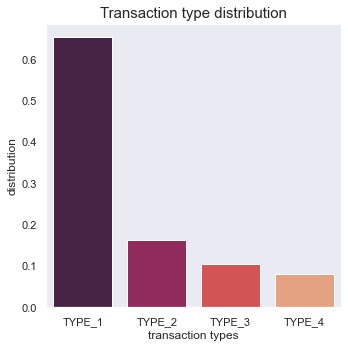

In [3]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=t_types_df.t_type, y=t_types_df.percent, palette = "rocket")
ax.set_title('Transaction type distribution', fontsize = 15)
ax.set_xlabel('transaction types')
ax.set_ylabel('distribution')
plt.tight_layout()

So from the distribution dataframe created and the barplot, we can tell that `TYPE_1` is the most used type of transaction by the users, reaching about 65%. This makes a lot of sense for the bank since this kind of transaction has a fee.

The remaining 35% of transactions are represented by `TYPE_2`, `TYPE_3` and `TYPE_4` transactions. Those are free of charge transactions so it's good for the bank that they are the less used ones.

We could go a little deeper here and look for the amount of fee this bank is charging per `TYPE_1` transaction so that we have an idea of the amount of profit the bank had over this type of transaction.

In [4]:
# get the total fee mean
total_fee_mean = round(df.fee.mean(),2)
total_fee_mean
# ted_fee_mean / not_ted_fee_mean

7.45

In [5]:
# get the mean of ted fee value
ted_fee_mean = round(df[df.t_type == 'TYPE_1'].fee.mean(),2)
ted_fee_mean

9.47

In [6]:
# get the mean of all other transactions fee value
not_ted_fee_mean = round(df[df.t_type != 'TYPE_1'].fee.mean(),2)
not_ted_fee_mean

0.25

In [7]:
round(ted_fee_mean / total_fee_mean, 2)

1.27

Overall the mean of fee values is 7.45. The mean of TYPE_1 fee value is 9.47 while the mean of other transactions fee value is only 0.25.

The mean fee value for TYPE_1 transfers is 27% higher than the mean fee value for all transactions.

Indeed the bank's profit over fees on `TYPE_1` transactions is the most significant.

In [8]:
# get the total fee value raised over ted transactions
round(df[df.t_type == 'TYPE_1'].fee.sum(),2)

186803.75

The total amount charged on TED fees by the bank was $186803.75.